# Preprocessing and Feature Engineering

In [1703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1704]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
sample_sub = pd.read_csv('../datasets/sample_sub_reg.csv')
train01 = pd.read_csv('../datasets/train_cols_cleaned_01.csv')
test01 = pd.read_csv('../datasets/test_cols_cleaned_01.csv')

## Processing for 1st set of predictions

In [1705]:
train01.head()

,id,lot_area,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold,saleprice
0,109,13517,2Story,6,1976,Y,2,1,3,Gd,2010,130500
1,544,11492,2Story,7,1996,Y,2,1,4,Gd,2009,220000
2,153,7922,1Story,5,1953,Y,1,0,3,Gd,2010,109000
3,318,9802,2Story,5,2006,Y,2,1,3,TA,2010,174000
4,255,14235,1.5Fin,6,1900,Y,2,0,3,TA,2010,138500


In [1706]:
test01.head()

,id,lot_area,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold
0,2658,9142,2Story,6,1910,N,2,0,4,Fa,2006
1,2718,9662,1Story,5,1977,Y,2,0,6,TA,2006
2,2414,17104,2Story,7,2006,Y,2,1,3,Gd,2006
3,1989,8520,1Story,5,1923,Y,1,0,2,TA,2007
4,625,9500,1Story,6,1963,Y,1,1,3,TA,2009


I need to get dummies on my object columns.

In [1707]:
train01 = pd.get_dummies(train01, columns=['central_air', 'kitchen_qual', 'house_style'], drop_first=True, dtype='int')

In [1708]:
test01 = pd.get_dummies(test01, columns=['central_air', 'kitchen_qual', 'house_style'], drop_first=True, dtype='int')

In [1709]:
train01.set_index('id', inplace=True)
test01.set_index('id', inplace=True)

In [1710]:
train01.head()

,lot_area,overall_qual,year_built,full_bath,half_bath,bedroom_abvgr,yr_sold,saleprice,central_air_Y,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
id,,,,,,,,,,,,,,,,,,,
109,13517,6,1976,2,1,3,2010,130500,1,0,1,0,0,0,0,0,1,0,0
544,11492,7,1996,2,1,4,2009,220000,1,0,1,0,0,0,0,0,1,0,0
153,7922,5,1953,1,0,3,2010,109000,1,0,1,0,0,1,0,0,0,0,0
318,9802,5,2006,2,1,3,2010,174000,1,0,0,1,0,0,0,0,1,0,0
255,14235,6,1900,2,0,3,2010,138500,1,0,0,1,0,0,0,0,0,0,0


In [1711]:
test01.head()

,lot_area,overall_qual,year_built,full_bath,half_bath,bedroom_abvgr,yr_sold,central_air_Y,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
id,,,,,,,,,,,,,,,,,,
2658,9142,6,1910,2,0,4,2006,0,1,0,0,0,0,0,0,1,0,0
2718,9662,5,1977,2,0,6,2006,1,0,0,1,0,1,0,0,0,0,0
2414,17104,7,2006,2,1,3,2006,1,0,1,0,0,0,0,0,1,0,0
1989,8520,5,1923,1,0,2,2007,1,0,0,1,0,1,0,0,0,0,0
625,9500,6,1963,1,1,3,2009,1,0,0,1,0,1,0,0,0,0,0


In [1712]:
train01.dtypes

lot_area              int64
overall_qual          int64
year_built            int64
full_bath             int64
half_bath             int64
bedroom_abvgr         int64
yr_sold               int64
saleprice             int64
central_air_Y         int32
kitchen_qual_Fa       int32
kitchen_qual_Gd       int32
kitchen_qual_TA       int32
house_style_1.5Unf    int32
house_style_1Story    int32
house_style_2.5Fin    int32
house_style_2.5Unf    int32
house_style_2Story    int32
house_style_SFoyer    int32
house_style_SLvl      int32
dtype: object

In [1713]:
test01.dtypes

lot_area              int64
overall_qual          int64
year_built            int64
full_bath             int64
half_bath             int64
bedroom_abvgr         int64
yr_sold               int64
central_air_Y         int32
kitchen_qual_Fa       int32
kitchen_qual_Gd       int32
kitchen_qual_TA       int32
house_style_1.5Unf    int32
house_style_1Story    int32
house_style_2.5Fin    int32
house_style_2.5Unf    int32
house_style_2Story    int32
house_style_SFoyer    int32
house_style_SLvl      int32
dtype: object

In [1714]:
X = train01.drop(columns=['saleprice'])
y = train01['saleprice']

In [1715]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1716]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [1717]:
regr.score(X, y)

0.7627816744203751

In [1718]:
regr.score(X_train, y_train)

0.7664060916857263

In [1719]:
regr.score(X_test, y_test)

0.7515120029796545

In [1720]:
y_pred = regr.predict(X)
y_pred

array([202089.5131997 , 232789.10823029, 133870.51177516, ...,
       148397.94502075, 100775.53505796, 218034.28350929])

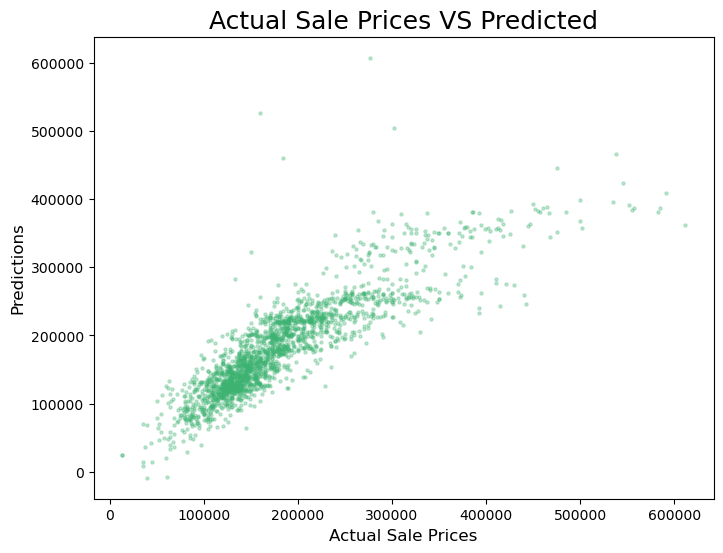

In [1721]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='mediumseagreen', alpha=0.3, s=5)
plt.title('Actual Sale Prices VS Predicted', size=18)
plt.xlabel('Actual Sale Prices', size=12)
plt.ylabel('Predictions', size=12)
plt.savefig('../images/model_01.png', dpi=192);

In [1722]:
metrics.r2_score(y, y_pred)

0.7627816744203751

In [1723]:
#test_y_pred = regr.predict()

In [1724]:
test01['saleprice'] = regr.predict(test01)

In [1725]:
test01.head()

,lot_area,overall_qual,year_built,full_bath,half_bath,bedroom_abvgr,yr_sold,central_air_Y,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,saleprice
id,,,,,,,,,,,,,,,,,,,
2658,9142,6,1910,2,0,4,2006,0,1,0,0,0,0,0,0,1,0,0,145811.481424
2718,9662,5,1977,2,0,6,2006,1,0,0,1,0,1,0,0,0,0,0,160879.086322
2414,17104,7,2006,2,1,3,2006,1,0,1,0,0,0,0,0,1,0,0,246342.487108
1989,8520,5,1923,1,0,2,2007,1,0,0,1,0,1,0,0,0,0,0,107102.259146
625,9500,6,1963,1,1,3,2009,1,0,0,1,0,1,0,0,0,0,0,163257.740678


In [1726]:
pred01 = test01[['saleprice']]
pred01.head()

,saleprice
id,
2658,145811.481424
2718,160879.086322
2414,246342.487108
1989,107102.259146
625,163257.740678


In [1727]:
pred01.to_csv('../datasets/Prediction_01.csv')

## Processing for 2nd set of predictions

Now that I've determined which categorical and numerical features I want to use in my predictions (Based on 01_EDA notebook), I'll do some preprocessing to prepare them for use in my next set of predictions

In [1728]:
train02 = pd.read_csv('../datasets/train_cols_cleaned_02.csv')
test02 = pd.read_csv('../datasets/test_cols_cleaned_02.csv')

I'll add my previously cleaned dataframes to the new ones

In [1729]:
train02.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,land_slope,neighborhood,roof_matl,...,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold,saleprice.1
0,1479,475.0,2.0,725.0,725,2005,1976.0,Gtl,Sawyer,CompShg,...,2Story,6,1976,Y,2,1,3,Gd,2010,130500
1,2122,559.0,2.0,913.0,913,1997,1997.0,Gtl,SawyerW,CompShg,...,2Story,7,1996,Y,2,1,4,Gd,2009,220000
2,1057,246.0,1.0,1057.0,1057,2007,1953.0,Gtl,NAmes,CompShg,...,1Story,5,1953,Y,1,0,3,Gd,2010,109000
3,1444,400.0,2.0,384.0,744,2007,2007.0,Gtl,Timber,CompShg,...,2Story,5,2006,Y,2,1,3,TA,2010,174000
4,1445,484.0,2.0,676.0,831,1993,1957.0,Gtl,SawyerW,CompShg,...,1.5Fin,6,1900,Y,2,0,3,TA,2010,138500


In [1730]:
# dropping duplicate saleprice column
train02 = train02.drop(columns='saleprice.1')

In [1731]:
test02.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,land_slope,neighborhood,roof_matl,...,lot_area,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold
0,1928,440,1,1020,908,1950,1910.0,Gtl,OldTown,CompShg,...,9142,2Story,6,1910,N,2,0,4,Fa,2006
1,1967,580,2,1967,1967,1977,1977.0,Gtl,Sawyer,CompShg,...,9662,1Story,5,1977,Y,2,0,6,TA,2006
2,1496,426,2,654,664,2006,2006.0,Gtl,Gilbert,CompShg,...,17104,2Story,7,2006,Y,2,1,3,Gd,2006
3,968,480,2,968,968,2006,1935.0,Gtl,OldTown,CompShg,...,8520,1Story,5,1923,Y,1,0,2,TA,2007
4,1394,514,2,1394,1394,1963,1963.0,Gtl,NAmes,CompShg,...,9500,1Story,6,1963,Y,1,1,3,TA,2009


In [1732]:
train02.dtypes

gr_liv_area         int64
garage_area       float64
garage_cars       float64
total_bsmt_sf     float64
1st_flr_sf          int64
year_remod/add      int64
garage_yr_blt     float64
land_slope         object
neighborhood       object
roof_matl          object
exter_qual         object
bsmtfin_type_2     object
saleprice           int64
id                  int64
lot_area            int64
house_style        object
overall_qual        int64
year_built          int64
central_air        object
full_bath           int64
half_bath           int64
bedroom_abvgr       int64
kitchen_qual       object
yr_sold             int64
dtype: object

In [1733]:
train03 = train02.copy()

In [1734]:
test03 = test02.copy()

In [1735]:
train02 = train02.drop(columns=['lot_area', 'house_style', 'central_air', 'half_bath', 'bedroom_abvgr', 'kitchen_qual', 'yr_sold'])

In [1736]:
test02 = test02.drop(columns=['lot_area', 'house_style', 'central_air', 'half_bath', 'bedroom_abvgr', 'kitchen_qual', 'yr_sold'])

In [1737]:
# creating a 4th set of train and test data for use later on
train04 = train02[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2', 'saleprice']]
test04 = test02[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2']]

In [1738]:
train02 = pd.get_dummies(train02, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2'], drop_first=True, dtype='int')

In [1739]:
test02 = pd.get_dummies(test02, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2'], drop_first=True, dtype='int')

In [1740]:
train02.set_index('id', inplace=True)
test02.set_index('id', inplace=True)

In [1741]:
X = train02.drop(columns='saleprice')
y = train02['saleprice']

In [1742]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1743]:
regr.fit(X_train, y_train)

LinearRegression()

In [1744]:
y_pred = regr.predict(X)
y_pred

array([178776.13678609, 216615.18637949, 134652.62394962, ...,
       188925.58691698, 117614.43593354, 201965.4166097 ])

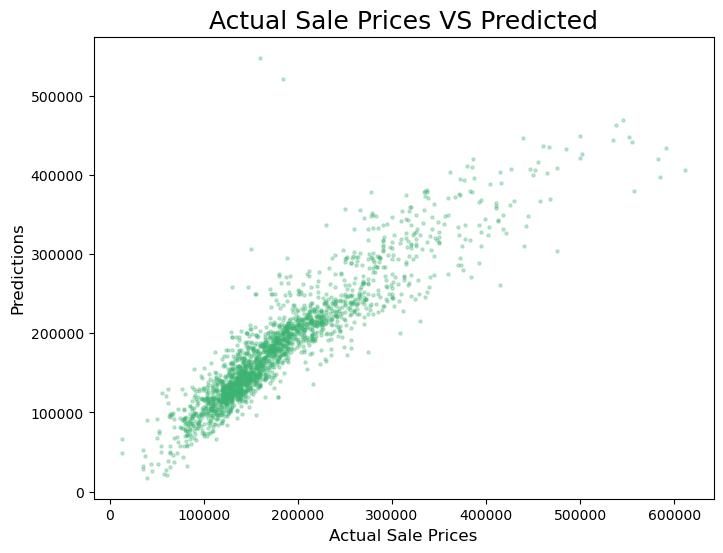

In [1745]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='mediumseagreen', alpha=0.3, s=5)
plt.title('Actual Sale Prices VS Predicted', size=18)
plt.xlabel('Actual Sale Prices', size=12)
plt.ylabel('Predictions', size=12)
plt.savefig('../images/model_02.png', dpi=192);

In [1746]:
regr.score(X_train, y_train)

0.8419982569119608

In [1747]:
regr.score(X_test, y_test)

0.8437994693524755

In [1748]:
test02['saleprice'] = regr.predict(test02)

In [1749]:
pred02 = test02[['saleprice']]
pred02.head()

,saleprice
id,
2658,146069.341252
2718,193539.392997
2414,192758.712294
1989,123688.884862
625,166753.039870


In [1750]:
pred02.to_csv('../datasets/Prediction_02.csv')

## Processing for 3rd set of predictions

I'm going to try using some regularization to see if I can improve upon my previous model

In [1751]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [1752]:
regr2 = LinearRegression()
regr2.fit(Z_train, y_train)
regr2.score(Z_train, y_train)

0.8419982569119608

In [1753]:
regr2.score(Z_test, y_test)

0.843799469352476

In [1754]:
ridge = Ridge(alpha=10)

In [1755]:
ridge.fit(Z_train, y_train)

Ridge(alpha=10)

In [1756]:
ridge.score(Z_train, y_train)

0.8417417904414626

In [1757]:
ridge.score(Z_test, y_test)

0.845856451931412

In [1758]:
ridge_alphas = np.logspace(0, 5, 100)
ridge_alphas

array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+01, 1.29154967e+01, 1.45082878e+01,
       1.62975083e+01, 1.83073828e+01, 2.05651231e+01, 2.31012970e+01,
       2.59502421e+01, 2.91505306e+01, 3.27454916e+01, 3.67837977e+01,
       4.13201240e+01, 4.64158883e+01, 5.21400829e+01, 5.85702082e+01,
       6.57933225e+01, 7.39072203e+01, 8.30217568e+01, 9.32603347e+01,
       1.04761575e+02, 1.17681195e+02, 1.32194115e+02, 1.48496826e+02,
       1.66810054e+02, 1.87381742e+02, 2.10490414e+02, 2.36448941e+02,
       2.65608778e+02, 2.98364724e+02, 3.35160265e+02, 3.76493581e+02,
       4.22924287e+02, 4.75081016e+02, 5.33669923e+02, 5.99484250e+02,
      

In [1759]:
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [1760]:
ridge_cv.alpha_

23.101297000831593

In [1761]:
ridge_cv.best_score_

0.8141386592479147

In [1762]:
ridge_cv.score(Z_train, y_train)

0.8410404071845554

In [1763]:
ridge_cv.score(Z_test, y_test)

0.8472943538665144

It looks like using ridge regression barely improved my model

In [1764]:
Z_train.shape

(1538, 49)

Fitting lasso regression

In [1765]:
lasso = Lasso(alpha=1.0)
lasso.fit(Z_train, y_train)

Lasso()

Using cross validation to find the optimal alpha value

In [1766]:
lasso_cv = LassoCV(n_alphas=100, cv=5, max_iter=50000)

In [1767]:
lasso_cv.fit(Z_train, y_train)

LassoCV(cv=5, max_iter=50000)

In [1768]:
lasso_cv.alpha_

136.35133355701274

In [1769]:
lasso_cv.score(Z_train, y_train)

0.8414101261929638

In [1770]:
lasso_cv.score(Z_test, y_test)

0.8478318622070453

In [1771]:
coefficients = lasso_cv.coef_
coefficients

array([ 2.13296695e+04,  4.29471867e+03,  4.52544013e+03,  4.55773401e+03,
        2.36049863e+03,  5.94879333e+03, -2.53577881e+02,  1.84829611e+04,
        6.35632109e+03,  2.31597530e+01,  4.24628147e+03,  2.64419323e+02,
       -1.66744104e+03, -2.51344743e+03,  3.58849349e+01,  1.30740923e+03,
        7.81864562e+02,  4.01960754e+03, -2.86422342e+03, -2.81307615e+02,
       -3.50262355e+02, -1.86869557e+03, -1.26758468e+03, -0.00000000e+00,
        9.12147541e+02, -1.69102150e+03,  3.66867547e+02,  7.90905530e+03,
        1.10792573e+04, -3.23136070e+03, -6.56041836e+02,  1.43027223e+02,
       -1.09816232e+03,  1.50420595e+03,  9.39594935e+03,  3.43070321e+03,
        1.26348577e+03, -7.62273945e+02, -2.59354078e+02,  4.53500191e+03,
       -7.59652108e+03, -2.66050070e+04, -2.97967866e+04, -1.55686895e+03,
        2.93253719e+02, -1.41815358e+03, -2.12695586e+03, -1.53073359e+03,
       -3.41575431e+03])

It looks like only one feature was removed by my lasso model

In [1772]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(feature_importance)

                 Feature   Coefficient
0            gr_liv_area  21329.669458
1            garage_area   4294.718671
2            garage_cars   4525.440127
3          total_bsmt_sf   4557.734012
4             1st_flr_sf   2360.498633
5         year_remod/add   5948.793333
6          garage_yr_blt   -253.577881
7           overall_qual  18482.961121
8             year_built   6356.321090
9              full_bath     23.159753
10        land_slope_Mod   4246.281474
11        land_slope_Sev    264.419323
12  neighborhood_Blueste  -1667.441041
13   neighborhood_BrDale  -2513.447425
14  neighborhood_BrkSide     35.884935
15  neighborhood_ClearCr   1307.409233
16  neighborhood_CollgCr    781.864562
17  neighborhood_Crawfor   4019.607545
18  neighborhood_Edwards  -2864.223421
19  neighborhood_Gilbert   -281.307615
20   neighborhood_Greens   -350.262355
21   neighborhood_IDOTRR  -1868.695572
22  neighborhood_MeadowV  -1267.584681
23  neighborhood_Mitchel     -0.000000
24    neighborhood_NAmes 

Neither lasso nor ridge regression seemed to meaningfully improve my model so I'm going to try making new predictions using all variables from my first and second sets of predictions

In [1773]:
train03.head()

,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_remod/add,garage_yr_blt,land_slope,neighborhood,roof_matl,...,lot_area,house_style,overall_qual,year_built,central_air,full_bath,half_bath,bedroom_abvgr,kitchen_qual,yr_sold
0,1479,475.0,2.0,725.0,725,2005,1976.0,Gtl,Sawyer,CompShg,...,13517,2Story,6,1976,Y,2,1,3,Gd,2010
1,2122,559.0,2.0,913.0,913,1997,1997.0,Gtl,SawyerW,CompShg,...,11492,2Story,7,1996,Y,2,1,4,Gd,2009
2,1057,246.0,1.0,1057.0,1057,2007,1953.0,Gtl,NAmes,CompShg,...,7922,1Story,5,1953,Y,1,0,3,Gd,2010
3,1444,400.0,2.0,384.0,744,2007,2007.0,Gtl,Timber,CompShg,...,9802,2Story,5,2006,Y,2,1,3,TA,2010
4,1445,484.0,2.0,676.0,831,1993,1957.0,Gtl,SawyerW,CompShg,...,14235,1.5Fin,6,1900,Y,2,0,3,TA,2010


In [1775]:
train03 = pd.get_dummies(train03, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2', 'house_style', 'central_air', 'kitchen_qual'], drop_first=True, dtype='int')
test03 = pd.get_dummies(test03, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2', 'house_style', 'central_air', 'kitchen_qual'], drop_first=True, dtype='int')

In [1776]:
train03.set_index('id', inplace=True)
test03.set_index('id', inplace=True)

In [1777]:
X = train03.drop(columns=['saleprice'])
y = train03['saleprice']

In [1778]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1779]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [1780]:
regr.score(X_train, y_train)

0.8524139071274942

In [1781]:
regr.score(X_test, y_test)

0.8602605949335448

In [1782]:
y_pred = regr.predict(X)
y_pred

C:\Users\rockm\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([182664.26187432, 219356.23748522, 138581.11273626, ...,
       187595.56168841, 119297.33116539, 197405.77104545])

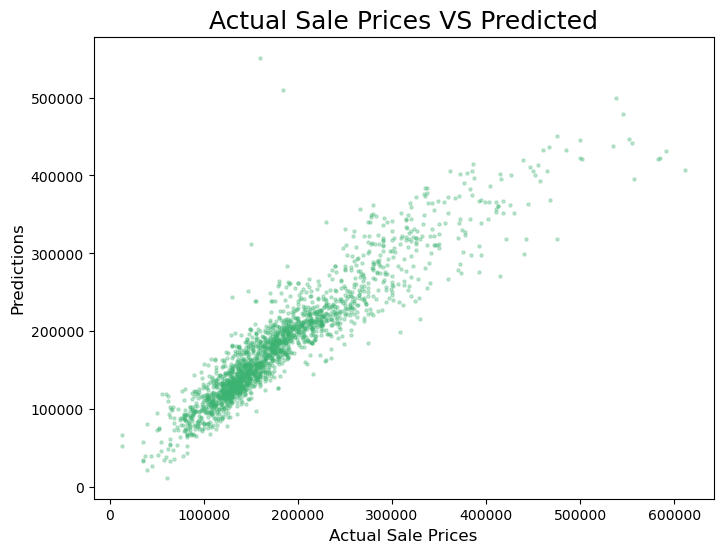

In [1783]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='mediumseagreen', alpha=0.3, s=5)
plt.title('Actual Sale Prices VS Predicted', size=18)
plt.xlabel('Actual Sale Prices', size=12)
plt.ylabel('Predictions', size=12)
plt.savefig('../images/model_03.png', dpi=192);

In [1784]:
test03['saleprice'] = regr.predict(test03)

In [1785]:
pred03 = test03[['saleprice']]
pred03.head()

,saleprice
id,
2658,138290.528721
2718,183725.169282
2414,198600.832988
1989,123159.970949
625,167292.173060


In [1786]:
pred03.to_csv('../datasets/Prediction_03.csv')

My best score yet, now I'll try using less features, only the most correlated numeric features and my ANOVA results.

In [1787]:
train04 = pd.get_dummies(train04, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2'], drop_first=True, dtype='int')
test04 = pd.get_dummies(test04, columns=['land_slope', 'neighborhood', 'roof_matl', 'exter_qual', 'bsmtfin_type_2'], drop_first=True, dtype='int')

In [1788]:
train04.describe()

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,saleprice,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,...,roof_matl_WdShngl,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_NONE,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.112140,1499.330083,473.671707,1.776585,1057.987805,1164.488055,181469.701609,0.042906,0.004876,0.002925,...,0.002438,0.012677,0.339834,0.607996,0.023403,0.011214,0.029254,0.027304,0.039005,0.852755
std,1.426271,500.447829,215.881887,0.764351,449.301078,396.446923,79258.659352,0.202694,0.069673,0.054021,...,0.049326,0.111902,0.473768,0.488317,0.151217,0.105327,0.168559,0.163007,0.193655,0.354437
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,12789.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1129.000000,319.000000,1.000000,793.000000,879.500000,129825.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,1444.000000,480.000000,2.000000,995.000000,1093.000000,162500.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1728.500000,576.000000,2.000000,1318.500000,1405.000000,214000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,5642.000000,1418.000000,5.000000,6110.000000,5095.000000,611657.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1789]:
X = train04.drop(columns='saleprice')
y = train04['saleprice']

In [1790]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1791]:
regr.fit(X_train, y_train)

LinearRegression()

In [1792]:
regr.score(X_train, y_train)

0.8374624399089533

In [1793]:
regr.score(X_test, y_test)

0.8386364285496836

Using less features didn't yield better results.

In [1794]:
train05 = train03.copy
test05 = test03.copy

In [1795]:
# Trying a new model where I drop columns with multicollinearity based on heatmap in my EDA notebook
train05 = train03.drop(columns=['garage_yr_blt', '1st_flr_sf', 'garage_cars'])
test05 = test03.drop(columns=['garage_yr_blt', '1st_flr_sf', 'garage_cars'])

In [1796]:
X = train05.drop(columns='saleprice')
y = train05['saleprice']

In [1797]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1798]:
regr.fit(X_train, y_train)

LinearRegression()

In [1799]:
regr.score(X_train, y_train)

0.85136319296252

In [1800]:
regr.score(X_test, y_test)

0.8601288832469466

Still doesn't beat my best R2 score

## Conclusions

- I was able to build successively more accurate models, with the final one being able to explain roughly 84% of the variability in sale prices based on my chosen predictor variables.
- Using Ridge and Lasso regularization didn't meaningfully improve my models in this situation
- Removing features with multicollinearity didn't seem to meaningfully improve my model's performance either
- Using more variables yieled better results